In [1]:
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.initializers import *
from tensorflow.keras.utils import *
from tensorflow.keras.models import *
from tensorflow.keras.datasets import *
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import datetime
import os
import pandas as pd
from PIL import Image
from matplotlib import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint,ReduceLROnPlateau

In [67]:
main_path="C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\"
open_folder = os.listdir(main_path)
Data_base_learning = main_path+open_folder[3]
Data_base_learning_v2 = main_path+open_folder[4]
path2 = "C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\"
open_folder1= os.listdir(path2)
Data_train = path2+open_folder1[10]
Data_test = path2+open_folder1[9]
print(open_folder1)
print(Data_test)

['.DS_Store', '.ipynb_checkpoints', '2014', '2015', '2016', '2017', '2018', 'All_years', 'Data_API.ipynb', 'Data_Test_Foot.csv', 'Data_Train_Foot.csv', 'Points_Equipe_Hist', 'Points_Equipe_Hist_VF', 'Recup_Data_Historical.ipynb', 'Teams_puiss.csv', 'Web_Score.ipynb']
C:\Users\Amrta\Documents\GitHub\projetannuel4IABD2\ETAPE_3\Scripts_Recup_Data\Projet_Annuel_Data\Data_Test_Foot.csv


Machine Amrta

In [68]:
filename = "C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\Data_Train_Foot.csv"
filename_test= 'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\Data_Test_Foot.csv'

Machine Dylane

In [3]:
filename = 'Scripts_Recup_Data/Projet_Annuel_Data/Data_Train_Foot.csv'
filename_test= 'Scripts_Recup_Data/Projet_Annuel_Data/Data_Test_Foot.csv'

In [4]:
# Chargement des données csv
data= pd.read_csv(filename,sep=";",index_col=0)
data
# y prend le score à prédire
y=data.mi_temps_gagnante
data.head()

,date,homeTeam,awayTeam,score,mi_temps_gagnante,goalHomeTeam_FullTime,goalAwayTeam_FullTime,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,NbgoalsHalfTime,...,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,puissance_HomeTeam,puissance_AwayTeam
0,2019-08-09 00:00:00,AS Monaco FC,Olympique Lyonnais,2.0,1,0.0,3.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2409,6154
1,2019-08-10 00:00:00,Olympique de Marseille,Stade de Reims,2.0,2,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4008,3054
2,2019-08-10 00:00:00,Montpellier HSC,Stade Rennais FC 1901,2.0,1,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3029,4815
3,2019-08-10 00:00:00,OGC Nice,Amiens SC,1.0,2,2.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2803,2045
4,2019-08-10 00:00:00,Stade Brestois 29,Toulouse FC,0.0,1,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2156,1065


In [71]:
data_test= pd.read_csv(filename_test,sep=";",index_col=0)
x_prediction=data_test[['date','status','id_match','homeTeam','awayTeam','idHomeTeam','idAwayTeam',
                        'puissance_HomeTeam','puissance_AwayTeam','win_cons_home','win_cons_away',
                        'lose_cons_home','lose_cons_away','moy_goals_home','moy_goals_away',
                        'moy_goals_half_home','moy_goals_half_away','moy_goals_conceded_home',
                        'moy_goals_conceded_away','moy_goals_conceded_half_home',
                        'moy_goals_conceded_half_away']]
x_prediction

,date,status,id_match,homeTeam,awayTeam,idHomeTeam,idAwayTeam,puissance_HomeTeam,puissance_AwayTeam,win_cons_home,...,lose_cons_home,lose_cons_away,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away
1424,2020-07-01,FINISHED,279508,ACF Fiorentina,US Sassuolo Calcio,99,471,2679,3086,0,...,1,0,1.214286,1.714286,0.500000,0.750000,1.392857,1.750000,0.535714,0.928571
1085,2020-07-01,FINISHED,273889,Real Betis Balompié,Villarreal CF,90,94,8949,5396,0,...,1,0,1.343750,1.593750,0.625000,0.687500,1.625000,1.250000,0.718750,0.343750
1423,2020-07-01,FINISHED,279512,Bologna FC 1909,Cagliari Calcio,103,104,3818,2866,1,...,0,0,1.428571,1.678571,0.535714,0.642857,1.607143,1.571429,0.892857,0.535714
1983,2020-07-01,FINISHED,274431,Sporting Clube de Portugal,Gil Vicente FC,498,5533,5314,1346,3,...,0,0,1.607143,1.071429,0.892857,0.428571,1.035714,1.250000,0.428571,0.678571
1982,2020-07-01,FINISHED,274433,Os Belenenses Futebol,CD Tondela,5568,1049,1589,1729,0,...,2,2,0.857143,0.821429,0.571429,0.392857,1.571429,1.250000,0.678571,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,SCHEDULED,274477,Sport Lisboa e Benfica,Sporting Clube de Portugal,1903,498,6562,5314,1,...,0,0,2.000000,1.566667,0.694444,0.866667,1.166667,1.000000,0.433333,0.400000
2025,2020-07-26,SCHEDULED,274478,Vitória FC,Os Belenenses Futebol,5620,5568,3593,1589,0,...,5,1,0.774194,0.833333,0.322581,0.566667,1.366667,1.666667,0.566667,0.700000
2026,2020-07-26,SCHEDULED,274479,CD Santa Clara,Vitória SC,5530,5543,3175,3593,0,...,2,0,0.966667,1.633333,0.400000,0.666667,1.200000,1.066667,0.500000,0.633333
2027,2020-07-26,SCHEDULED,274480,Portimonense SC,CD Aves,5601,5544,1067,1159,0,...,2,0,0.806452,0.774194,0.419355,0.483871,1.354839,1.903226,0.612903,0.741935


Sans les win/lose/cons et les moyennes half_time plus utiles pour les modèles de predic mi-temps

In [5]:
x=data[['puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away','moy_goals_conceded_home',
        'moy_goals_conceded_away']]

data_test= pd.read_csv(filename_test,sep=";",index_col=0)
x_prediction=data_test[['date','status','id_match','homeTeam','awayTeam','idHomeTeam','idAwayTeam',
                        'puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away',
                        'moy_goals_conceded_home','moy_goals_conceded_away']]
x_prediction

,date,status,id_match,homeTeam,awayTeam,idHomeTeam,idAwayTeam,puissance_HomeTeam,puissance_AwayTeam,moy_goals_home,moy_goals_away,moy_goals_conceded_home,moy_goals_conceded_away
1424,2020-07-01,FINISHED,279508,ACF Fiorentina,US Sassuolo Calcio,99,471,2679,3086,1.214286,1.714286,1.392857,1.750000
1085,2020-07-01,FINISHED,273889,Real Betis Balompié,Villarreal CF,90,94,8949,5396,1.343750,1.593750,1.625000,1.250000
1423,2020-07-01,FINISHED,279512,Bologna FC 1909,Cagliari Calcio,103,104,3818,2866,1.428571,1.678571,1.607143,1.571429
1983,2020-07-01,FINISHED,274431,Sporting Clube de Portugal,Gil Vicente FC,498,5533,5314,1346,1.607143,1.071429,1.035714,1.250000
1982,2020-07-01,FINISHED,274433,Os Belenenses Futebol,CD Tondela,5568,1049,1589,1729,0.857143,0.821429,1.571429,1.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,SCHEDULED,274477,Sport Lisboa e Benfica,Sporting Clube de Portugal,1903,498,6562,5314,2.000000,1.566667,1.166667,1.000000
2025,2020-07-26,SCHEDULED,274478,Vitória FC,Os Belenenses Futebol,5620,5568,3593,1589,0.774194,0.833333,1.366667,1.666667
2026,2020-07-26,SCHEDULED,274479,CD Santa Clara,Vitória SC,5530,5543,3175,3593,0.966667,1.633333,1.200000,1.066667
2027,2020-07-26,SCHEDULED,274480,Portimonense SC,CD Aves,5601,5544,1067,1159,0.806452,0.774194,1.354839,1.903226


In [6]:
x=np.array(x)
y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

y_train = y_train.astype(np.int)
classes=np.unique(y_train)
nbClasses=len(classes)
print(x_train.shape,y_train.shape)
print(nbClasses)


(9238, 6) (9238,)
3


In [7]:
def create_model():
    
    model = Sequential()
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(12, activation='softmax'))    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])
    return model

In [8]:
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               3584      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               66048     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 512)               66048     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_6 (Dense)              (None, 512)               6

In [76]:
save = ModelCheckpoint('model_Foot_mi_temps_Col.h5', monitor = 'val_accuracy' , verbose = 1 , save_best_only = True)

In [77]:
history = model.fit(x_train, y_train,validation_data=(x_test,y_test),batch_size=90,epochs=100,
                    callbacks = [save])

Train on 9238 samples, validate on 2310 samples
Epoch 1/100
9180/9238 [============================>.] - ETA: 0s - loss: 4.8758 - accuracy: 0.3773
Epoch 00001: val_accuracy improved from -inf to 0.31991, saving model to model_Foot_mi_temps_Col.h5
9238/9238 [==============================] - 2s 254us/sample - loss: 4.8526 - accuracy: 0.3774 - val_loss: 1.2173 - val_accuracy: 0.3199
Epoch 2/100
9000/9238 [============================>.] - ETA: 0s - loss: 1.1420 - accuracy: 0.4083
Epoch 00002: val_accuracy improved from 0.31991 to 0.44545, saving model to model_Foot_mi_temps_Col.h5
9238/9238 [==============================] - 1s 125us/sample - loss: 1.1406 - accuracy: 0.4090 - val_loss: 1.0950 - val_accuracy: 0.4455
Epoch 3/100
8730/9238 [===========================>..] - ETA: 0s - loss: 1.1095 - accuracy: 0.4183
Epoch 00003: val_accuracy improved from 0.44545 to 0.45281, saving model to model_Foot_mi_temps_Col.h5
9238/9238 [==============================] - 1s 132us/sample - loss: 1.1105

8910/9238 [===========================>..] - ETA: 0s - loss: 1.0646 - accuracy: 0.4441
Epoch 00056: val_accuracy did not improve from 0.46580
9238/9238 [==============================] - 1s 117us/sample - loss: 1.0650 - accuracy: 0.4435 - val_loss: 1.0568 - val_accuracy: 0.4658
Epoch 57/100
8730/9238 [===========================>..] - ETA: 0s - loss: 1.0650 - accuracy: 0.4444
Epoch 00057: val_accuracy did not improve from 0.46580
9238/9238 [==============================] - 1s 112us/sample - loss: 1.0650 - accuracy: 0.4435 - val_loss: 1.0588 - val_accuracy: 0.4658
Epoch 58/100
9000/9238 [============================>.] - ETA: 0s - loss: 1.0642 - accuracy: 0.4439
Epoch 00058: val_accuracy did not improve from 0.46580
9238/9238 [==============================] - 1s 108us/sample - loss: 1.0644 - accuracy: 0.4436 - val_loss: 1.0570 - val_accuracy: 0.4658
Epoch 59/100
8820/9238 [===========================>..] - ETA: 0s - loss: 1.0644 - accuracy: 0.4429
Epoch 00059: val_accuracy did not imp

Text(0, 0.5, 'Accuracy')

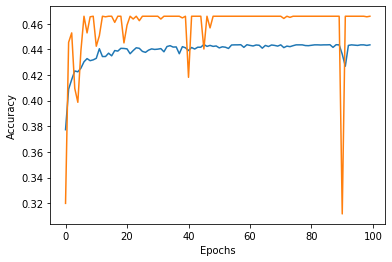

In [78]:
plt.plot(history.history['accuracy'],label='Accuracy')#bleu
plt.plot(history.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Prédiction

In [13]:
unique = x_prediction.values
results = []
pred_aucun=[]
pred_premiere=[]
pred_seconde=[]

i = 0
unique[1]

array(['2020-07-01', 'FINISHED', 273889, 'Real Betis Balompié',
       'Villarreal CF', 90, 94, 8949, 5396, 1.34375, 1.59375, 1.625, 1.25],
      dtype=object)

In [10]:
model.load_weights("model_Foot_mi_temps_Col.h5")

In [32]:
nbClasses

3

In [14]:
for i in unique:
    predictions_final = model.predict(np.array([[i[7],i[8],i[9],i[10],i[11],i[12]]])) 
    result = np.argmax(predictions_final)
    results.append(result)
    aucun = round(predictions_final[0][0]*100,2)
    premiere = round(predictions_final[0][1]*100,2)
    seconde = round(predictions_final[0][2]*100,2)
    pred_aucun.append(aucun)
    pred_premiere.append(premiere)
    pred_seconde.append(seconde)

In [82]:
np.asarray(results)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int64)

In [83]:
df = {'date':x_prediction.date,'id_match':x_prediction.id_match,'status':x_prediction.status,'id_HomeTeam':x_prediction.idHomeTeam,'id_AwayTeam':x_prediction.idAwayTeam,
      'homeTeam':x_prediction.homeTeam,'AwayTeam':x_prediction.awayTeam,'mi_temps_gagnante':results}
df = pd.DataFrame(df)
df

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,mi_temps_gagnante
1424,2020-07-01,279508,FINISHED,99,471,ACF Fiorentina,US Sassuolo Calcio,2
1085,2020-07-01,273889,FINISHED,90,94,Real Betis Balompié,Villarreal CF,2
1423,2020-07-01,279512,FINISHED,103,104,Bologna FC 1909,Cagliari Calcio,2
1983,2020-07-01,274431,FINISHED,498,5533,Sporting Clube de Portugal,Gil Vicente FC,2
1982,2020-07-01,274433,FINISHED,5568,1049,Os Belenenses Futebol,CD Tondela,2
...,...,...,...,...,...,...,...,...
2024,2020-07-26,274477,SCHEDULED,1903,498,Sport Lisboa e Benfica,Sporting Clube de Portugal,2
2025,2020-07-26,274478,SCHEDULED,5620,5568,Vitória FC,Os Belenenses Futebol,2
2026,2020-07-26,274479,SCHEDULED,5530,5543,CD Santa Clara,Vitória SC,2
2027,2020-07-26,274480,SCHEDULED,5601,5544,Portimonense SC,CD Aves,2


In [84]:
df.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_mi_temps_gagnante\\predictions_mi_temps_gagnante.csv',index = False)
df.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_mi_temps_gagnante\\predictions_mi_temps_gagnante.json')

In [85]:
finished = []
scheduled = []

In [86]:
for i in df.values:
    if i[2] == 'FINISHED':
        finished.append(i)
    else:
        scheduled.append(i)

In [87]:
column_names = ["date","id_match", "status","id_HomeTeam","id_AwayTeam","homeTeam","AwayTeam","mi_temps_gagnante"]
df_fini = pd.DataFrame(finished,columns = column_names)
df_programme = pd.DataFrame(scheduled,columns = column_names)

In [88]:
df_fini

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,mi_temps_gagnante
0,2020-07-01,279508,FINISHED,99,471,ACF Fiorentina,US Sassuolo Calcio,2
1,2020-07-01,273889,FINISHED,90,94,Real Betis Balompié,Villarreal CF,2
2,2020-07-01,279512,FINISHED,103,104,Bologna FC 1909,Cagliari Calcio,2
3,2020-07-01,274431,FINISHED,498,5533,Sporting Clube de Portugal,Gil Vicente FC,2
4,2020-07-01,274433,FINISHED,5568,1049,Os Belenenses Futebol,CD Tondela,2
...,...,...,...,...,...,...,...,...
82,2020-07-09,279534,FINISHED,450,108,Hellas Verona FC,FC Internazionale Milano,2
83,2020-07-09,273907,FINISHED,89,88,RCD Mallorca,Levante UD,2
84,2020-07-09,273913,FINISHED,278,745,SD Eibar,CD Leganés,2
85,2020-07-09,264674,FINISHED,62,340,Everton FC,Southampton FC,2


In [89]:
df_programme

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,mi_temps_gagnante
0,2020-07-11,264686,SCHEDULED,68,563,Norwich City FC,West Ham United FC,2
1,2020-07-11,264689,SCHEDULED,346,67,Watford FC,Newcastle United FC,2
2,2020-07-11,264683,SCHEDULED,64,328,Liverpool FC,Burnley FC,2
3,2020-07-11,264687,SCHEDULED,356,61,Sheffield United FC,Chelsea FC,2
4,2020-07-11,264688,SCHEDULED,397,65,Brighton & Hove Albion FC,Manchester City FC,2
...,...,...,...,...,...,...,...,...
172,2020-07-26,274477,SCHEDULED,1903,498,Sport Lisboa e Benfica,Sporting Clube de Portugal,2
173,2020-07-26,274478,SCHEDULED,5620,5568,Vitória FC,Os Belenenses Futebol,2
174,2020-07-26,274479,SCHEDULED,5530,5543,CD Santa Clara,Vitória SC,2
175,2020-07-26,274480,SCHEDULED,5601,5544,Portimonense SC,CD Aves,2


In [90]:
df_fini.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_mi_temps_gagnante\\predictions_mi_temps_gagnante_finished.csv',index=False)
df_fini.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_mi_temps_gagnante\\predictions_mi_temps_gagnante_finished.json')

In [91]:
df_programme.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_mi_temps_gagnante\\predictions_mi_temps_gagnante_scheduled.csv',index=False)
df_programme.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_mi_temps_gagnante\\predictions_mi_temps_gagnante_scheduled.json')